Reto: Explorando el índice de felicidad

Act:DS_C3_SC1

Eduardo Frias Rosales

Indicaciones:

•	Una vez terminado el reto deberás subir a la plataforma el enlace generado.

Instrucciones:
El Informe Mundial sobre la Felicidad es una encuesta que clasifica a 156 países por sus niveles de bienestar, tomando en cuenta 6 factores:
1.	Producción económica
2.	Apoyo social
3.	Esperanza de vida
4.	Libertad
5.	Generosidad
6.	Ausencia de corrupción
El primer informe se publicó en 2012 y continúa ganando reconocimiento mundial a medida que los gobiernos, las organizaciones y la sociedad civil utilizan cada vez más indicadores de felicidad para informar sus decisiones de formulación de políticas.
En este sentido, se tomará el estudio del 2019 para explorar los datos por país o región y obtener gráficas relevantes. El archivo incluye el puntaje (score) en una escala donde la mejor vida posible está representada con 10 y la peor con 0. Las siguientes columnas representan la medida en que los seis factores contribuyen a evaluar la felicidad en cada país.
Para lograr lo anterior, descarga el archivo Happiness_reporte.csv y el dataframe Metadata.csv, y realiza los siguientes pasos:


In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 2 Guarda en un dataframe (happiness) todos los registros del archivo Happiness_report.csv.
happiness = pd.read_csv('Happiness_report.csv')

# 3 A partir del dataframe happiness obtén otro (mexico) donde únicamente almacenes la información de México. Haz que la columna Country or region quede como índice.
mexico = happiness.loc[happiness['Country or region'] == 'Mexico']
mexico.set_index('Country or region', inplace=True)

mexico



,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Country or region,,,,,,,,
Mexico,23,6.595,1.07,1.323,0.861,0.433,0.074,0.073


Text(6.694999999999999, 10, 'México - 6.59')

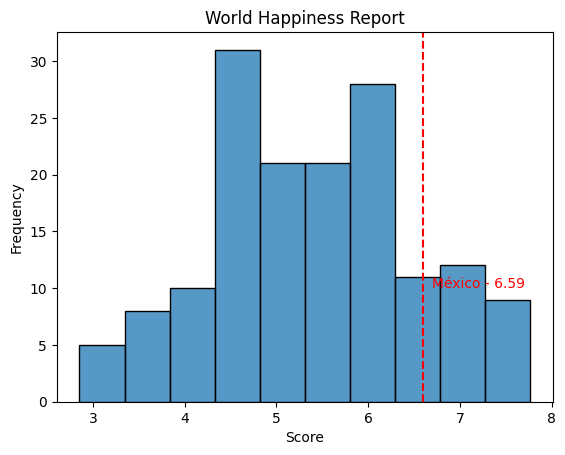

In [5]:
# 4 Obtén un histograma del puntaje (score) para identificar el rango o clase más frecuente. Ubica el valor de México con una etiqueta de texto.
# Histograma del puntaje
sns.histplot(happiness['Score'], bins=10)
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.title('World Happiness Report')

# Valor de México
mexico_score = mexico['Score'].values[0]
plt.axvline(mexico_score, color='red', linestyle='--', label='México')
plt.text(mexico_score + 0.1, 10, f'México - {mexico_score:.2f}', color='red')


Text(0.5, 1, 'Mexico\n  0.86')

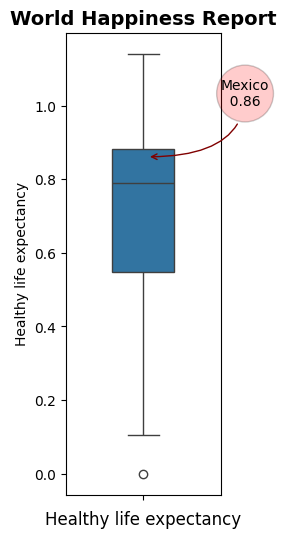

In [6]:
#5 Construye un boxplot para la columna esperanza de vida (Healthy life expectancy). Ubica el valor de México con una anotación (es decir una flecha con el valor dentro del boxplot). Con orient H pero solo exe x
# Crear el boxplot
plt.figure(figsize=(2, 6))  # Ajustar el tamaño de la figura
sns.boxplot(y='Healthy life expectancy', data=happiness, width=0.4)  # Ajustar el ancho de la caja

# Añadir etiquetas y título
plt.xlabel('Healthy life expectancy', fontsize=12)
plt.title('World Happiness Report', fontsize=14, fontweight='bold')

# Valor de México
mexHLE = mexico['Healthy life expectancy'].values[0]

# Flecha que conecta la leyenda y el rectángulo
plt.annotate(f'Mexico\n  {mexHLE:.2f}', xy=(0.025,mexHLE), xytext=(.5,1),
             arrowprops=dict(arrowstyle='->', connectionstyle='angle3', color='maroon'),
             bbox=dict(facecolor='red', alpha=0.2, boxstyle='circle'))



,Factors
GDP per capita,1.070
Social support,1.323
Healthy life expectancy,0.861
Freedom to make life choices,0.433
Generosity,0.074
Perceptions of corruption,0.073


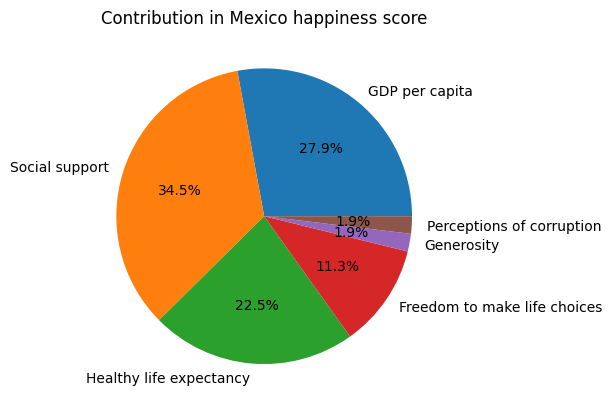

In [31]:
# 6	Crea una gráfica circular para analizar en qué medida los factores contribuyen a evaluar la felicidad en México.

#Preparamos los datos retirando columnas no necesarias y trasponiendo la tabla
MexPie = mexico.drop(columns=['Overall rank','Score'])
MexPie = MexPie.T
MexPie.columns = ['Factors']

#Creamos la gráfica circular
MexPie.plot.pie(y='Factors',autopct='%1.1f%%')
plt.title('Contribution in Mexico happiness score')
plt.ylabel('')
plt.xlabel('')
plt.legend().remove()

MexPie

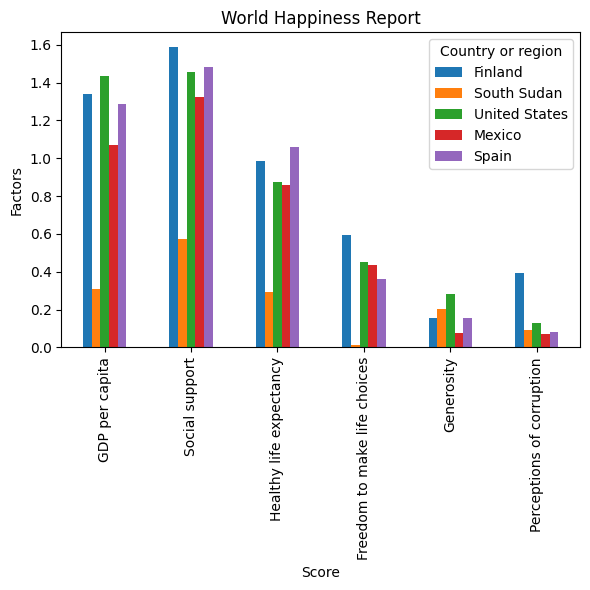

In [52]:
# 7 Filtra el dataframe para quedarte con 5 países (el más feliz, el menos feliz, México y dos más de tu interés) y visualiza en una misma gráfica los 6 factores(factores en el eje x. )

# Obtenemos los países
happiest = happiness.loc[happiness['Overall rank'] == 1]
least_happy = happiness.loc[happiness['Overall rank'] == 156]
countries = happiness.loc[happiness['Country or region'].isin(['United States', 'Spain', 'Mexico'])]

# Preparamos los datos para la gráfica
top_5 = pd.concat([happiest, least_happy, countries])
top_5 = top_5.drop(columns=['Overall rank', 'Score'])
top_5 = top_5.set_index('Country or region').T

# Creamos la gráfica
top_5.plot(kind='bar', figsize=(6, 6))
plt.title('World Happiness Report')
plt.xlabel('Score')
plt.ylabel('Factors')
plt.tight_layout()


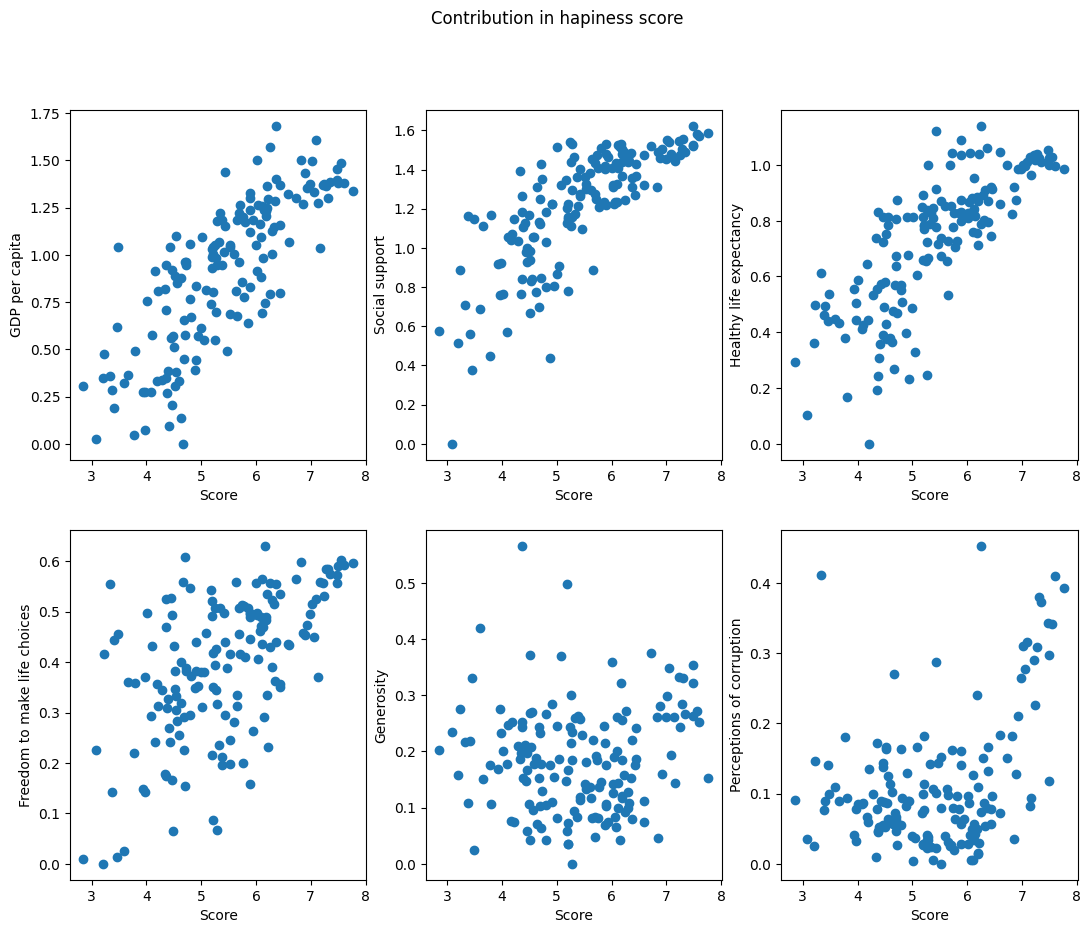

In [53]:
# 8 Crea una matriz de subgráficas de 2 x 3 con scatter plots del puntaje (score) versus los 6 factores, para determinar qué factor influye más en la evaluación.

#Preparamos la gráfica
fig,axs = plt.subplots(2,3, figsize=(13,10))

# Creamos las graficas
axs[0,0].scatter(x=happiness['Score'],y=happiness['GDP per capita'])
axs[0,1].scatter(x=happiness['Score'],y=happiness['Social support'])
axs[0,2].scatter(x=happiness['Score'],y=happiness['Healthy life expectancy'])
axs[1,0].scatter(x=happiness['Score'],y=happiness['Freedom to make life choices'])
axs[1,1].scatter(x=happiness['Score'],y=happiness['Generosity'])
axs[1,2].scatter(x=happiness['Score'],y=happiness['Perceptions of corruption'])

#Añadimos títulos y etiquetas
fig.suptitle('Contribution in hapiness score')
axs[0,0].set_ylabel('GDP per capita')
axs[0,1].set_ylabel('Social support')
axs[0,2].set_ylabel('Healthy life expectancy')
axs[1,0].set_ylabel('Freedom to make life choices')
axs[1,1].set_ylabel('Generosity')
axs[1,2].set_ylabel('Perceptions of corruption')

for i in range(3):
  axs[0,i].set_xlabel('Score')
  axs[1,i].set_xlabel('Score')

<Axes: >

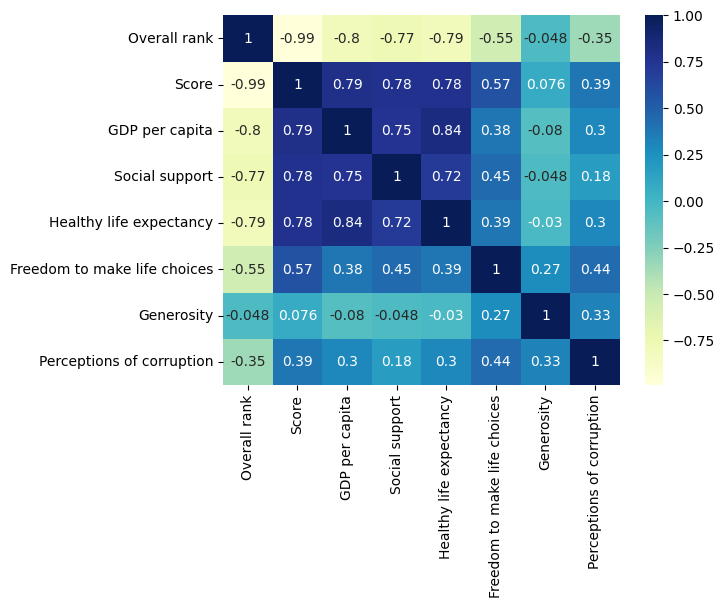

In [57]:
# 8 Comprueba lo anterior con un heatmap donde incluyas los índices de correlación.

# Configura el índice del DataFrame a 'Country or region'
heatlabels = happiness.set_index('Country or region')

# Crea un mapa de calor de correlación
sns.heatmap(heatlabels.corr(),annot=True, cmap="YlGnBu")


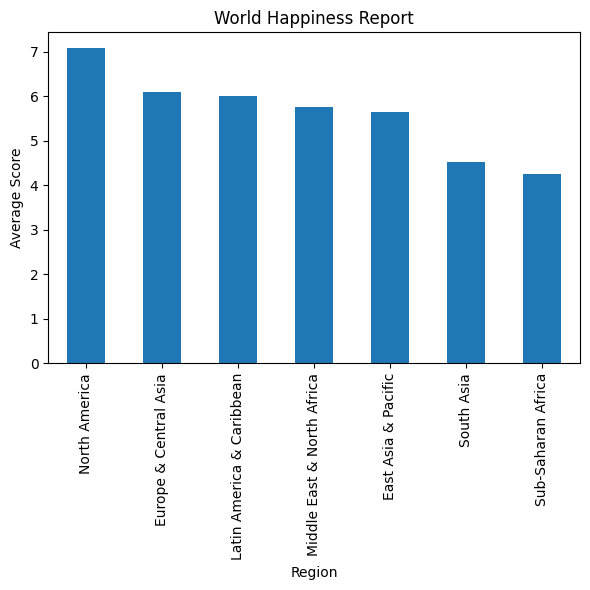

In [63]:
# 9 Combina con el dataframe metada (Metadata.csv) para graficar la felicidad promedio por región.

# Carga el dataframe Metadata.csv
metadata = pd.read_csv('Metadata.csv')

# Combina los dataframes happiness y metadata usando la columna 'Country or region' como clave
merged_df = pd.merge(happiness, metadata, left_on='Country or region', right_on='TableName', how='left')

# Calcula la felicidad promedio por región
average_happiness_by_region = merged_df.groupby('Region')['Score'].mean().sort_values(ascending=False)

# Grafica la felicidad promedio por región
plt.figure(figsize=(6, 6))
average_happiness_by_region.plot(kind='bar')
plt.title('World Happiness Report')
plt.xlabel('Region')
plt.ylabel('Average Score')
plt.tight_layout()
